1. Extraer los siguentes estadísiticos del conjunto de datos para varias de las varibles disponibles:
Utilizando métodos de pandas: media, mediana, moda, máximo y mínimo
 - Percentiles 25, 75
 - Rango Intercualtílico
 - Boxplot de algunas variables
 - Tabla de frecuencias
 - Variables cualitativas
 - Variables cuantitativas
 - Frecuencia acumulada
 - Representación de al menos una tabla de frecuencias

In [22]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('ds_salaries.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [5]:
df.describe() # variables cuantitativas

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [7]:
df.describe(include=object) # variables cualitativas

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,607,607,607,607,607,607,607
unique,4,4,50,17,57,50,3
top,SE,FT,Data Scientist,USD,US,US,M
freq,280,588,143,398,332,355,326


In [8]:
# Trabajamos sobre la variable salary_in_usd

In [15]:
df['salary_in_usd'].describe() # de aquí sacamos la mean, min, max y percentiles (25%, 75%)

count       607.000000
mean     112297.869852
std       70957.259411
min        2859.000000
25%       62726.000000
50%      101570.000000
75%      150000.000000
max      600000.000000
Name: salary_in_usd, dtype: float64

In [14]:
mediana = df['salary_in_usd'].var()
mediana

5034932663.176105

In [17]:
moda = df['salary_in_usd'].mode()
moda

0    100000
dtype: int64

In [20]:
# Rango Intercualtílico
q3, q1 = np.percentile(df['salary_in_usd'], [75,25])
iqr = q3 - q1
iqr

87274.0

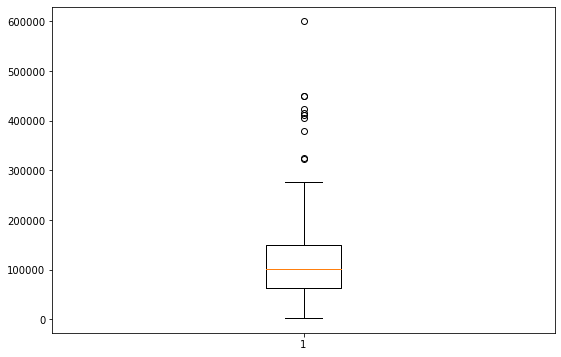

In [34]:
# Boxplot de salary_in_usd 
a = df['salary_in_usd']

fig = plt.figure(1,figsize=(9,6))
ax = fig.add_subplot(1,1,1)

bp = ax.boxplot([a])


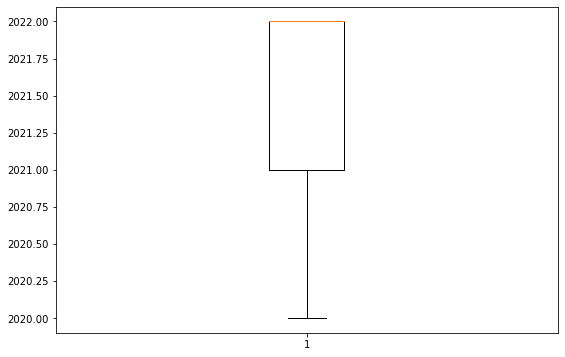

In [36]:
# boxplot para work_year
b = df['work_year']

fig = plt.figure(1,figsize=(9,6))
ax = fig.add_subplot(1,1,1)

bp = ax.boxplot([b])

In [60]:
# frequencia de salary_in_usd
frec_usd = df.groupby('salary_in_usd')
frec_usd.size()
df_salary = frec_usd.size().reset_index(name='frecuencia')
df_salary.head()

,salary_in_usd,frecuencia
0,2859,1
1,4000,2
2,5409,1
3,5679,1
4,5707,1


In [74]:
df[df['salary_in_usd']< 62573.1].value_counts()

Unnamed: 0  work_year  experience_level  employment_type  job_title                           salary   salary_currency  salary_in_usd  employee_residence  remote_ratio  company_location  company_size
3           2020       MI                FT               Product Data Analyst                20000    USD              20000          HN                  0             HN                S               1
253         2021       EN                FT               Data Scientist                      2100000  INR              28399          IN                  100           IN                M               1
264         2021       MI                FT               Data Scientist                      21600    EUR              25532          RS                  100           DE                S               1
268         2021       MI                FT               Data Engineer                       250000   TRY              28016          TR                  100           TR              

In [62]:
# Frecuencia acumulada de salary_in_usd
df_salary['grupo'] = pd.cut(df['salary_in_usd'], bins =10)

a = df_salary.groupby('grupo').agg(frecuencia=('salary_in_usd','count'))
a

,frecuencia
grupo,
"(2261.859, 62573.1]",111
"(62573.1, 122287.2]",139
"(122287.2, 182001.3]",79
"(182001.3, 241715.4]",25
"(241715.4, 301429.5]",8
"(301429.5, 361143.6]",1
"(361143.6, 420857.7]",2
"(420857.7, 480571.8]",3
"(480571.8, 540285.9]",0


<AxesSubplot:ylabel='Frequency'>

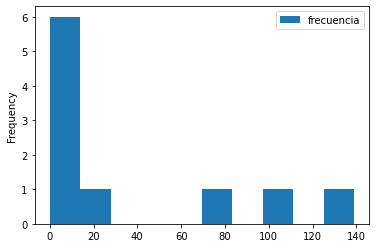

In [67]:
# Representación de al menos una tabla de frecuencias

a.plot.hist()